In [1]:
import numpy as np
import matplotlib.pyplot as plt
N=1000

In [2]:
#calculating wavelength for each sample point
def wavelength(d, t):   # d is motor distance and t is motor scan time
    ans = []
    dx = (1/N)*(2*d/t)*(10)  # 10 refers to the sampling time in seconds
    for i in range(0,N):
        y = N*(dx)/(i+1)*(1e9) # gives wavelength in nm
        ans.append(y)
    return ans

# remove large intensities at ends of interval
def squarefunc(a,b):  #a and b are limits for our square function
    square = []
    for i in range(0,N):
        if a < i < b:
            square.append(1)
        else:
            square.append(0)
    return square

# print the corresponding wavelength for the peak of the spectrum
def maxwavelength(ftamp, wavelength):
    l = np.argmax(ftamp)
    m = wavelength[l]
    return print(f'maximum wavelength occurs at \u03BB={(m):.3f} nm')

Blue Laser Data

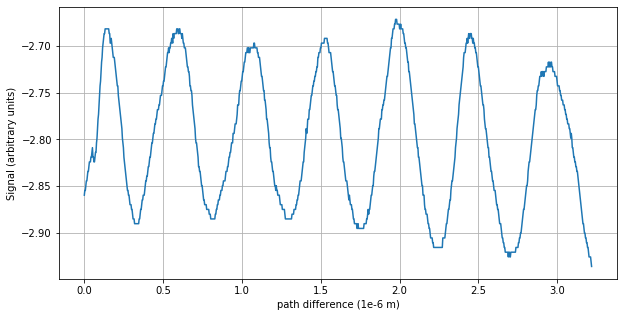

In [3]:
blue=np.loadtxt("/data/Blue_Laser.txt")
scanspeedblue=2*(2.45e-4)/(1523)   # m/s 
xblue=(1e6)*scanspeedblue*np.linspace(0,10,1000) # gives interferogram data in distance 

plt.figure(figsize = (10,5))
plt.plot(xblue,blue)
plt.ylabel('Signal (arbitrary units)')
plt.xlabel('path difference (1e-6 m)')
plt.grid();

maximum wavelength occurs at λ=402.167 nm


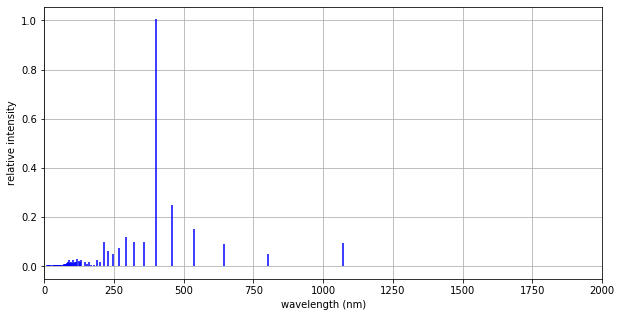

In [4]:
ft1=np.fft.fft(blue)
ftamp1=(1/48)*np.abs(ft1)*squarefunc(1,500)    # normalise the intensity

x1=wavelength(2.45e-4,1523)
plt.figure(figsize = (10,5))
plt.vlines(x1,0,ftamp1,'b')
plt.ylabel('relative intensity')
plt.xlabel('wavelength (nm)')
#plt.plot(x1[np.argmax(ftamp1)], 1, 'kx')    # pin point the max wavelength of the spectrum
plt.xlim(0,2000)
plt.grid()
maxwavelength(ftamp1,x1);

Green Laser Data

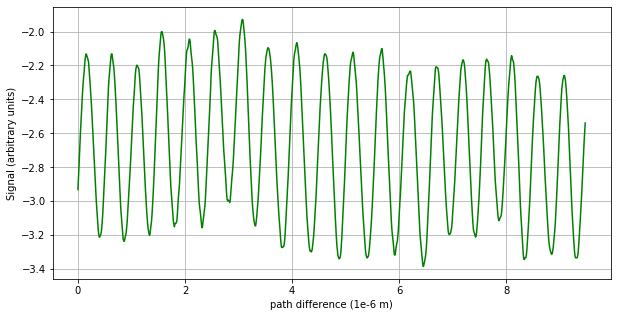

In [5]:
green=np.loadtxt("/data/Green_Laser.txt")
scanspeedgreen=2*(3.67e-4)/(775)   # m/s 
xgreen=(1e6)*scanspeedgreen*np.linspace(0,10,1000) # gives interferogram data in distance 

plt.figure(figsize = (10,5))
plt.plot(xgreen,green, 'g')
plt.ylabel('Signal (arbitrary units)')
plt.xlabel('path difference (1e-6 m)')
plt.grid();

maximum wavelength occurs at λ=473.548 nm


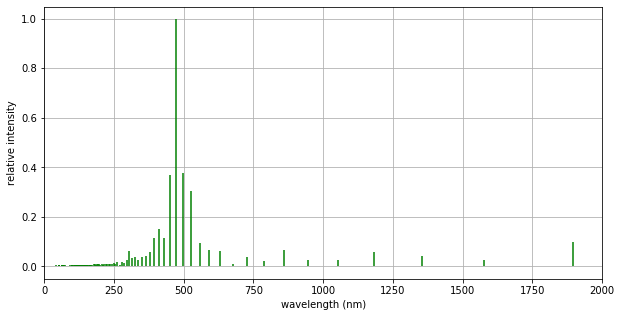

In [6]:
ft2=np.fft.fft(green)
ftamp2=(1/230)*np.abs(ft2)*squarefunc(1,500)    # normalise the intensity

x2=wavelength(3.67e-4,775)
plt.figure(figsize = (10,5))
plt.vlines(x2,0,ftamp2,'g')
plt.ylabel('relative intensity')
plt.xlabel('wavelength (nm)')
#plt.plot(x2[np.argmax(ftamp2)], 1, 'kx')    # pin point the max wavelength of the spectrum
plt.xlim(0,2000)
plt.grid()
maxwavelength(ftamp2,x2);

HeNe Laser Data

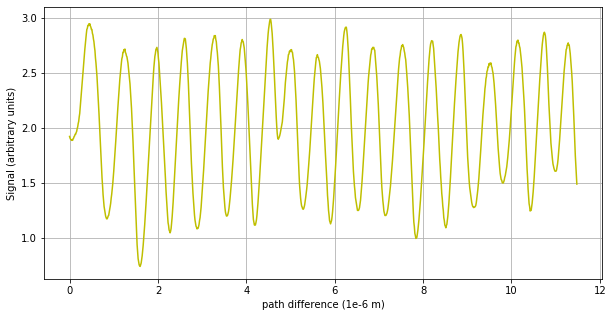

In [7]:
hene=np.loadtxt("/data/HeNe_Laser.txt")
scanspeedhene=2*(3.567e-4)/(621.5)   # m/s 
xhene=(1e6)*scanspeedhene*np.linspace(0,10,1000) # gives interferogram data in distance 

plt.figure(figsize = (10,5))
plt.plot(xhene,hene, 'y')
plt.ylabel('Signal (arbitrary units)')
plt.xlabel('path difference (1e-6 m)')
plt.grid();

maximum wavelength occurs at λ=604.141 nm


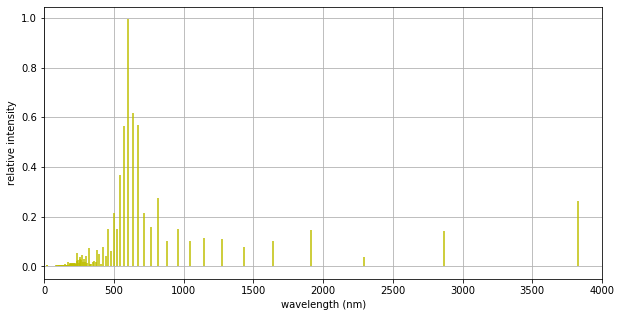

In [8]:
ft3=np.fft.fft(hene)
ftamp3=(1/250)*np.abs(ft3)*squarefunc(1,500)    # normalise the intensity

x3=wavelength(3.567e-4,621.5)
plt.figure(figsize = (10,5))
plt.vlines(x3,0,ftamp3,'y')
plt.ylabel('relative intensity')
plt.xlabel('wavelength (nm)')
#plt.plot(x3[np.argmax(ftamp3)], 1, 'kx')    # pin point the max wavelength of the spectrum
plt.xlim(0,4000)
plt.grid()
maxwavelength(ftamp3,x3);

In [9]:
# looking at path difference
def pathdiff(d, t):   # d is motor distance and t is motor scan time
    dx = (1/N)*(2*d/t)*(10)  # 10 refers to the sampling time in seconds
    return dx
greendx=pathdiff(3.67e-4,775)
henedx=pathdiff(3.567e-4,621.5)
bluedx=pathdiff(2.45e-4,1523)
print('path difference for green laser =' , greendx, 'nm')
print('path difference for HeNe laser =' , henedx, 'nm')
print('path difference for blue laser =' , bluedx, 'nm')

path difference for green laser = 9.470967741935483e-09 nm
path difference for HeNe laser = 1.1478680611423974e-08 nm
path difference for blue laser = 3.2173342087984242e-09 nm
